<a href="https://colab.research.google.com/github/kushagrasharma-13/Python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Classification on Social Network Data-set

Correlation

Plotting

Confusion Matrix

Classification Report

Accuracy, Precision, Recall, F1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load "Social_Network_Ads.csv" dataset
dataset = pd.read_csv("/content/drive/MyDrive/Python/Datasets/Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-6-ffd37e1235a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


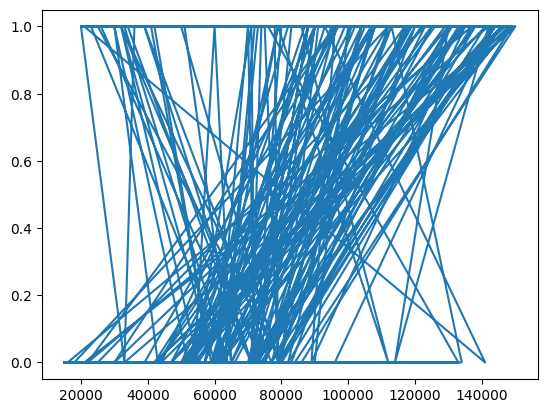

In [ ]:
x_points = np.array(dataset['EstimatedSalary'])
y_points = np.array(dataset['Purchased'])
plt.plot(x_points, y_points)
plt.show()

In [ ]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [ ]:
SC = StandardScaler()

In [ ]:
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [ ]:
svc = SVC(random_state=8)
svc.fit(x_train, y_train)

SVC(random_state=8)

In [ ]:
y_pred = svc.predict(x_test)

Confusion Matrix: 


<Axes: >

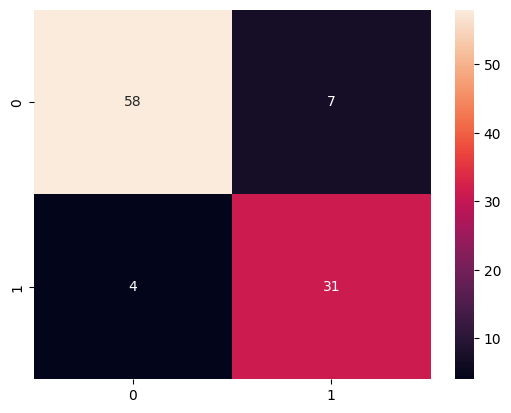

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print("Classification Report: ")
classes = ['0','1']
print(classification_report(y_test, y_pred, target_names = classes))

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        65
           1       0.82      0.89      0.85        35

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1_score: {:.2f}%".format(f1_score(y_test, y_pred)*100))

Accuracy: 89.00%
Precision: 81.58%
Recall: 88.57%
F1_score: 84.93%
